# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [256]:
# %pip install --upgrade plotly

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.head()
df_pct_poverty.head()
df_pct_completed_hs.head()
df_share_race_city.head()
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
print(f'Shape of Median_Household_Income_2015: {df_hh_income.shape}')
print(f'Shape of Pct_People_Below_Poverty_Level: {df_pct_poverty.shape}')
print(f'Shape of Pct_Over_25_Completed_High_School: {df_pct_completed_hs.shape}')
print(f'Shape of Share_of_Race_By_City: {df_share_race_city.shape}')
print(f'Shape of Deaths_by_Police_US: {df_fatalities.shape}')

Shape of Median_Household_Income_2015: (29322, 3)
Shape of Pct_People_Below_Poverty_Level: (29329, 3)
Shape of Pct_Over_25_Completed_High_School: (29329, 3)
Shape of Share_of_Race_By_City: (29268, 7)
Shape of Deaths_by_Police_US: (2535, 14)


In [23]:
# df_hh_income.isna().any()
print("Household Income NaN values:", df_hh_income.isna().values.any()) # Median Income column
print("Household Income duplicates:", df_hh_income.duplicated().any())

Household Income NaN values: True
Household Income duplicates: False


In [27]:
# df_pct_poverty.isna().any()
print("People_Below_Poverty_Level NaN values:", df_pct_poverty.isna().values.any()) 
print("People_Below_Poverty_Level duplicates:", df_pct_poverty.duplicated().any())

People_Below_Poverty_Level NaN values: False
People_Below_Poverty_Level duplicates: False


Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [31]:
df_pct_completed_hs.isna().any()
df_pct_completed_hs.duplicated().any()

False

In [33]:
df_share_race_city.isna().any()
df_share_race_city.duplicated().any()

False

In [44]:
df_fatalities.isna().any() # armed,age,race,flee NaN values True
df_fatalities.duplicated().any()
df_fatalities.tail(5)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [57]:
df_hh_income.fillna(0)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [52]:
# df_fatalities.dropna(inplace=True)
# df_fatalities.info()
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [60]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(lambda x:str(x).replace('-','0') ).astype('float64')
df_pct_poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

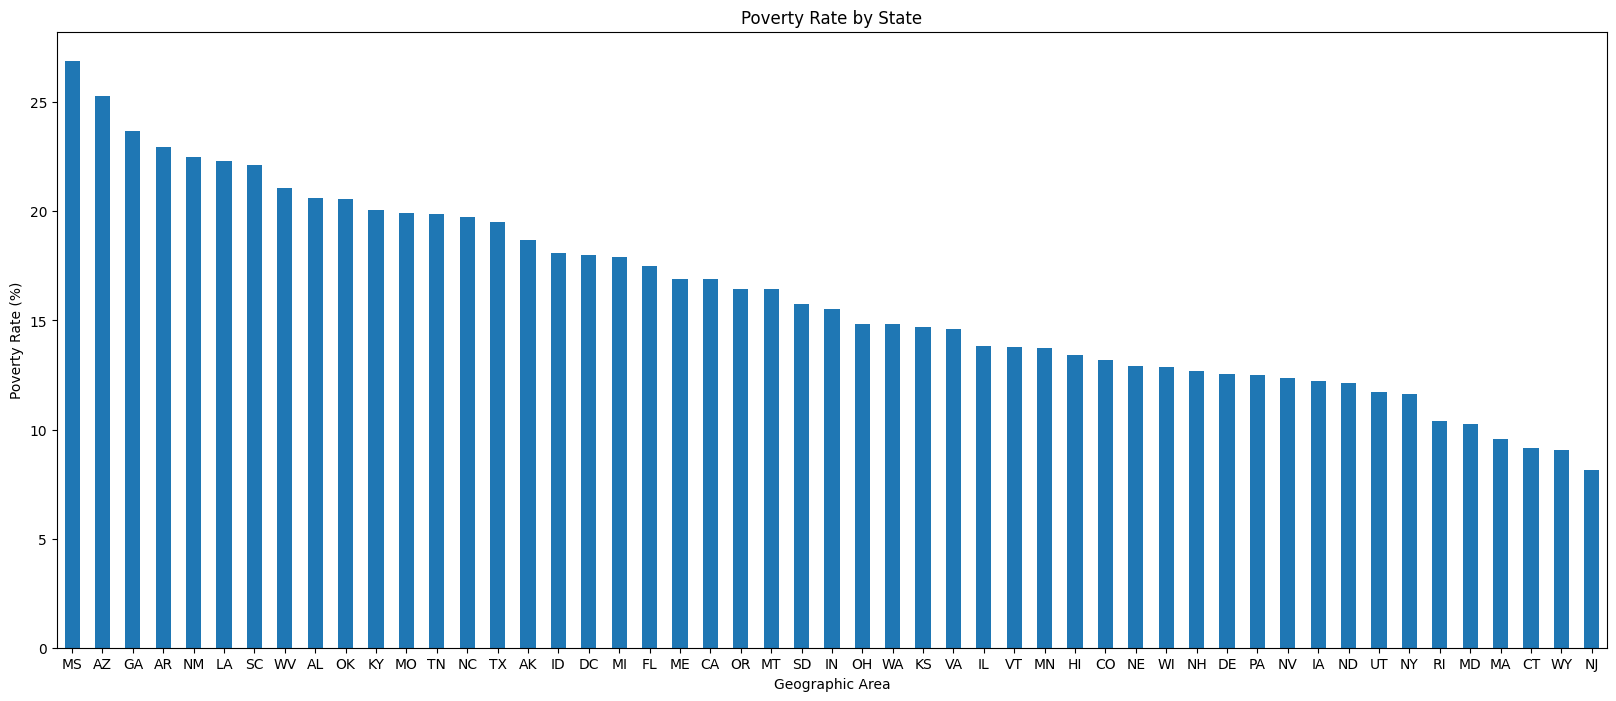

In [64]:
poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
poverty_by_state.plot(kind='bar',figsize=(20,8),title='Poverty Rate by State',rot=0)
plt.ylabel('Poverty Rate (%)')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [68]:
# Convert percent_complete_hs column object type to float64 type
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(lambda x:str(x).replace('-','0')).astype('float64')
df_pct_completed_hs.dtypes

Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object

In [69]:
hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
hs_by_state.head()

Geographic Area
TX   74.09
MS   78.47
GA   78.63
NM   78.97
LA   79.12
Name: percent_completed_hs, dtype: float64

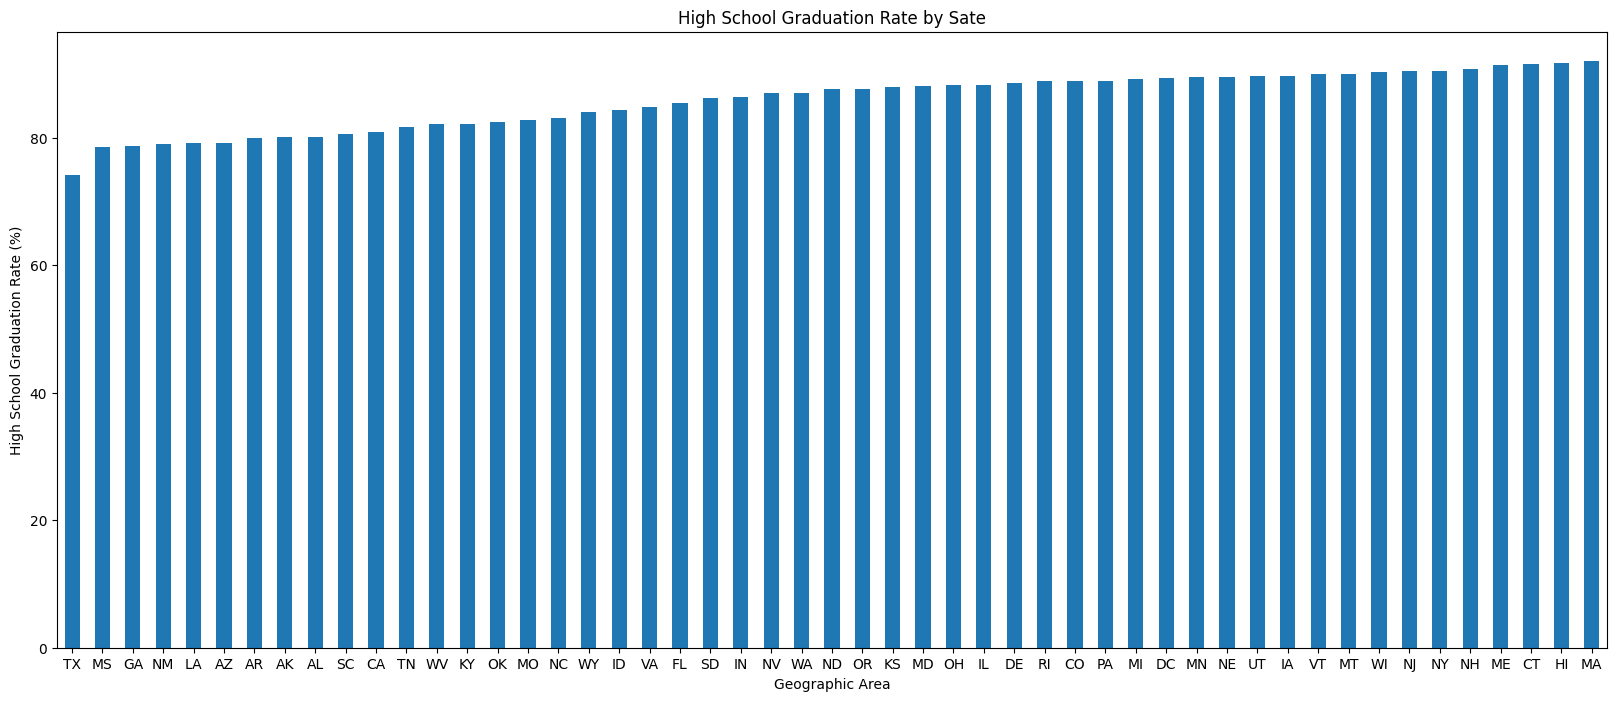

In [71]:
hs_by_state.plot(kind='bar', figsize=(20,8),title="High School Graduation Rate by Sate",rot=0)
plt.ylabel('High School Graduation Rate (%)')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [76]:
hs_by_state.sort_index(inplace=True)
poverty_by_state.sort_index(inplace=True)
poverty_by_state.index==hs_by_state.index


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

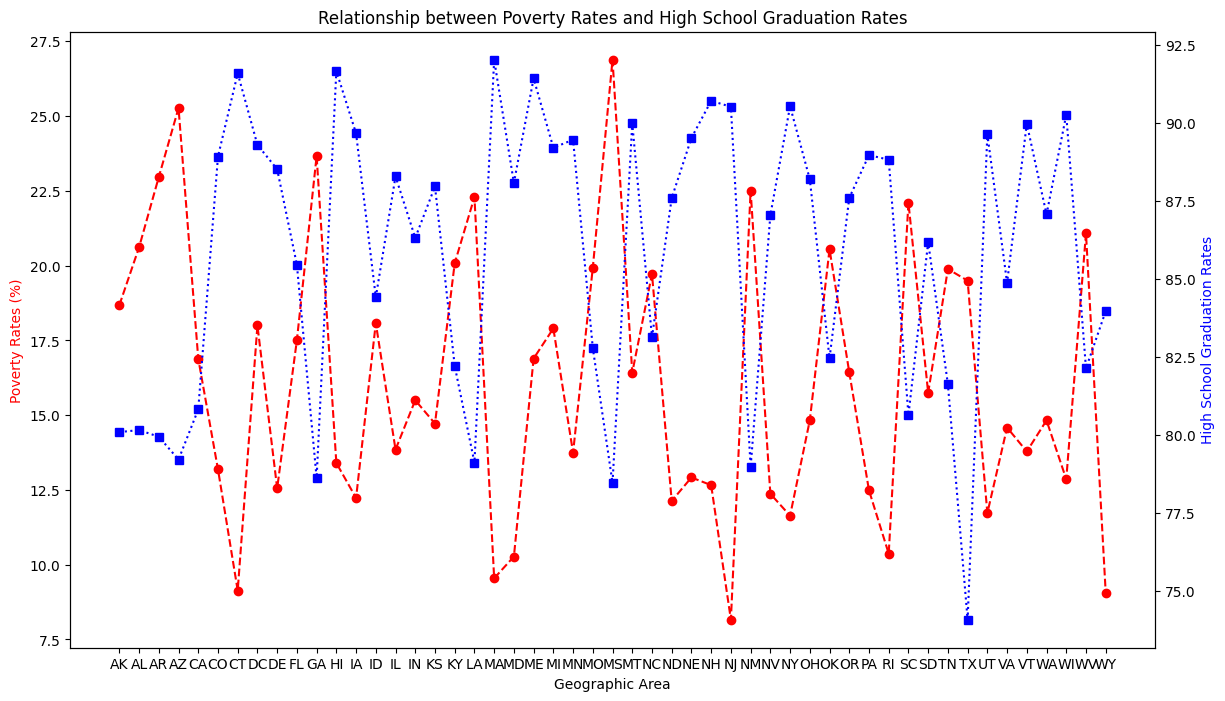

In [81]:
plt.figure(figsize=(14,8),dpi=100)
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Geographic Area')
ax1.set_ylabel('Poverty Rates (%)', color='red')
ax2.set_ylabel('High School Graduation Rates',color='blue')

ax1.plot(poverty_by_state.index,poverty_by_state, color='red',linestyle='dashed',marker='o')
ax2.plot(hs_by_state.index,hs_by_state, color='blue',linestyle='dotted',marker='s')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [83]:
poverty_hs_comparison = pd.concat([hs_by_state,poverty_by_state],axis=1)
poverty_hs_comparison.head()

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.10,18.68
AL,80.16,20.61
AR,79.95,22.96
AZ,79.22,25.27
CA,80.82,16.89


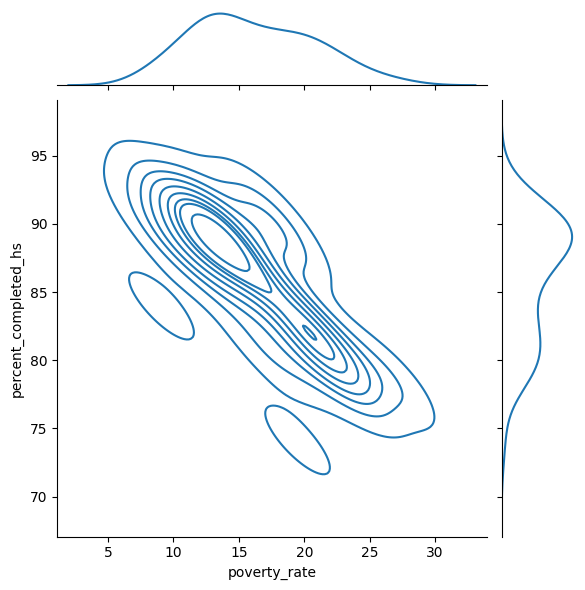

In [84]:
sns.jointplot(data=poverty_hs_comparison,y='percent_completed_hs',x='poverty_rate',kind='kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

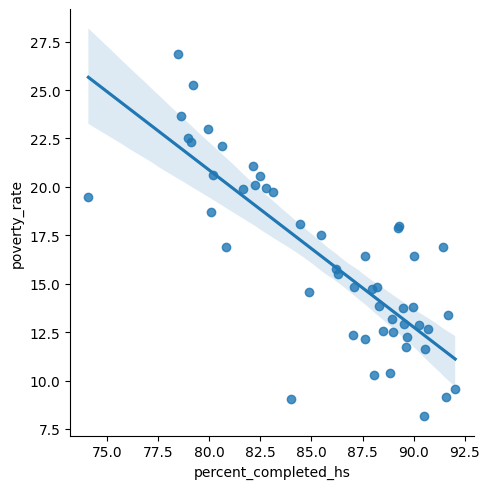

In [85]:
sns.lmplot(data=poverty_hs_comparison,y='poverty_rate',x='percent_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [89]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [91]:
race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].mean()
race_by_state.head()


,share_white,share_black,share_asian,share_hispanic,share_native_american
Geographic area,,,,,
AK,45.26,0.56,1.38,2.13,45.48
AL,72.51,23.32,0.48,2.98,0.66
AR,78.45,16.30,0.48,4.27,0.76
AZ,59.93,0.95,0.73,20.14,28.59
CA,71.54,2.68,5.54,29.51,1.72


<Axes: title={'center': 'Share of Race by State'}, xlabel='Geographic area'>

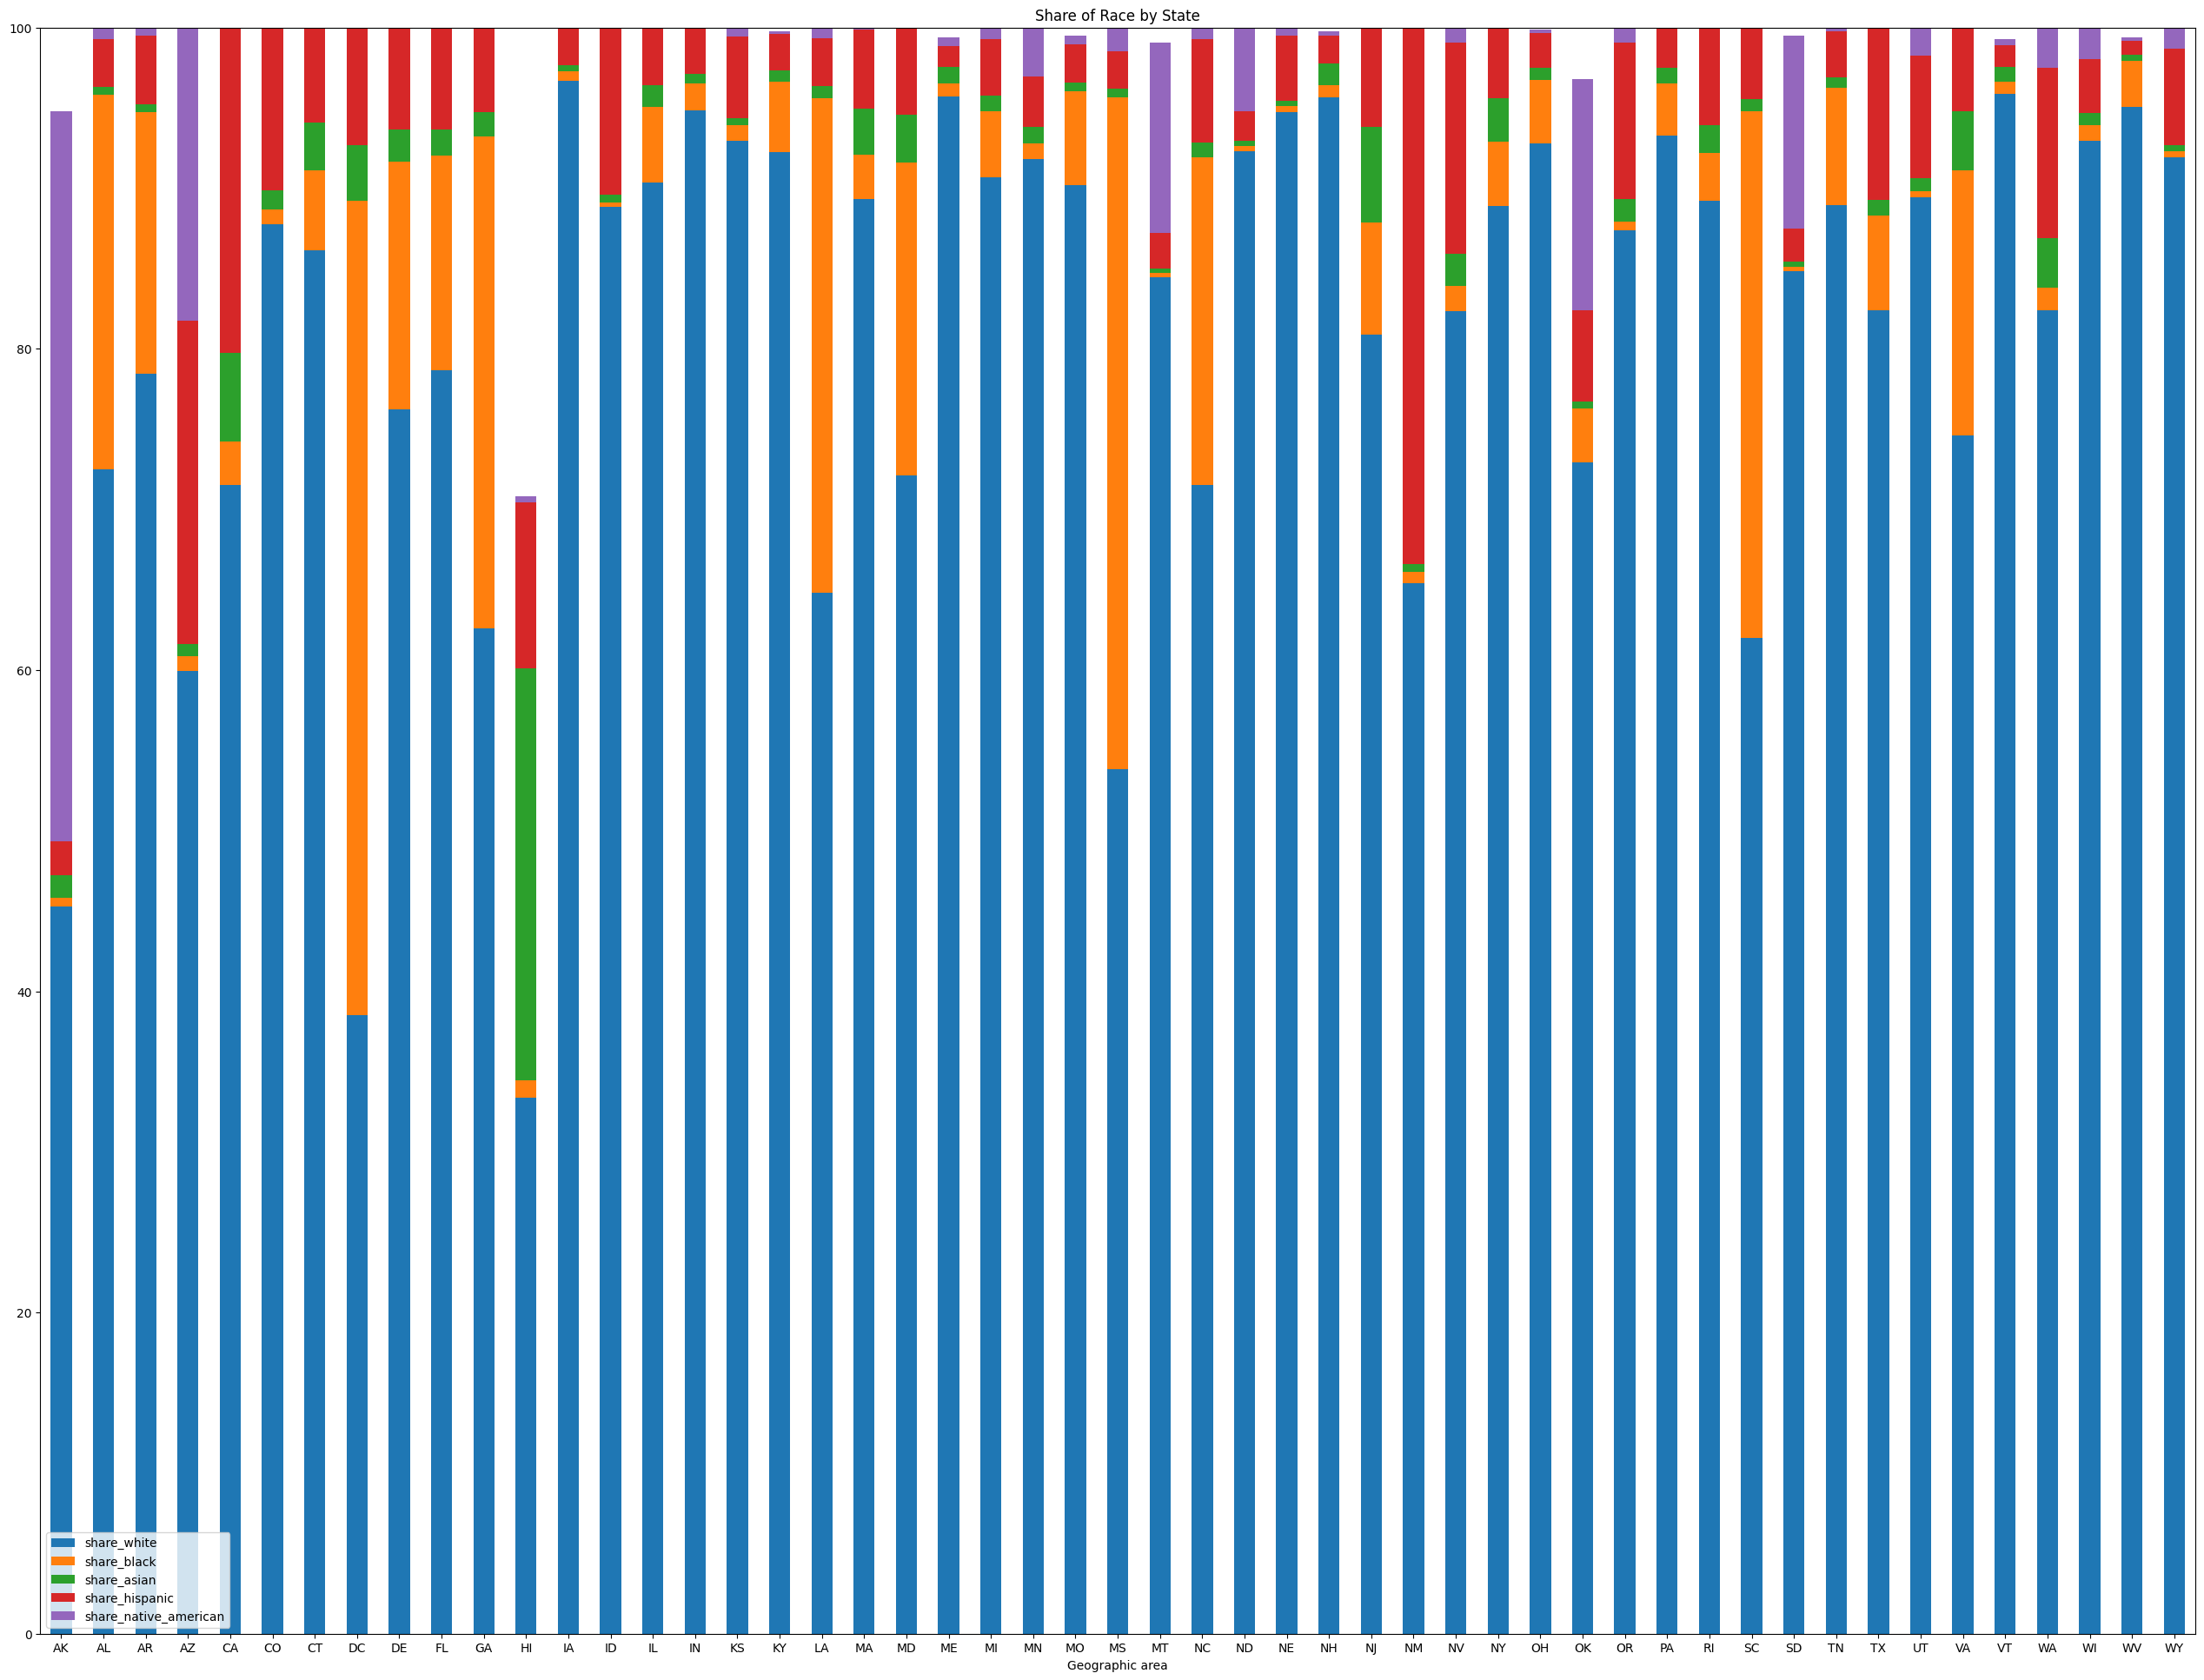

In [92]:
race_by_state.plot(
    kind='bar',
    figsize = (32,24),
    title = 'Share of Race by State',
    rot=0,
    stacked=True,
    ylim=(0,100),
)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [148]:
victims_by_race = df_fatalities['race'].value_counts().rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'})
victims_by_race


race
White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Others               28
Name: count, dtype: int64

In [124]:
fig = px.pie(names=victims_by_race.index,values=victims_by_race.values, title="Victims by Race",hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [125]:
victims_by_gender = df_fatalities['gender'].value_counts().rename({'M': 'Male', 'F': 'Female'})
victims_by_gender

gender
Male      2160
Female      94
Name: count, dtype: int64

In [128]:
fig = px.pie(values=victims_by_gender,names=victims_by_gender.index,title='Victims by Gender')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [129]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Male)'
)

In [130]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Female)'
)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [135]:
armed_vs_unarmed = pd.Series({
    'armed':len(df_fatalities[df_fatalities['armed']!='unarmed']),
    'unarmed':len(df_fatalities[df_fatalities['armed']=='unarmed'])
})
armed_vs_unarmed

armed      2089
unarmed     165
dtype: int64

In [136]:
px.pie(
    names = armed_vs_unarmed.index,
    values = armed_vs_unarmed.values,
    title = 'Armed vs Unarmed Percentage'
)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [142]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police killing victims are under the age of 25')


18.72% of police killing victims are under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

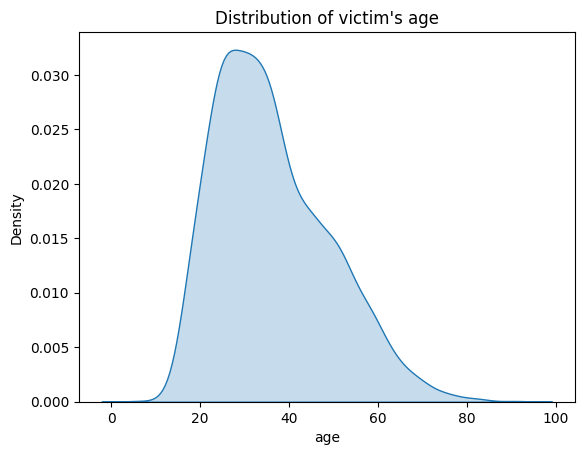

In [157]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

In [169]:
fig = px.histogram(df_fatalities, x='age', title="Distribution of Victim's Age")
fig.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

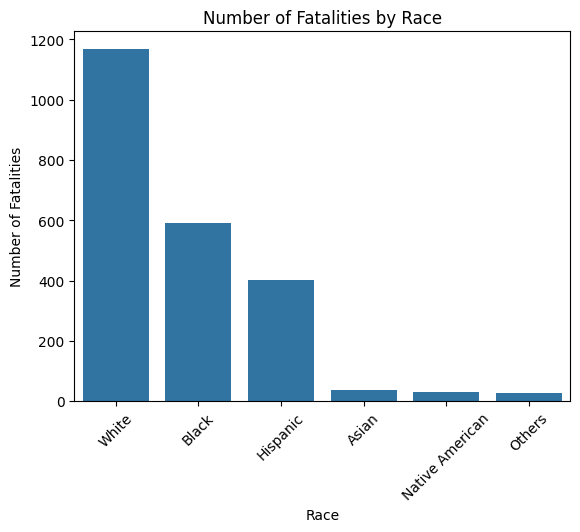

In [179]:
sns.barplot(x=victims_by_race.index, y=victims_by_race.values)

plt.xlabel('Race')
plt.ylabel('Number of Fatalities')
plt.title('Number of Fatalities by Race')
plt.xticks(rotation=45)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

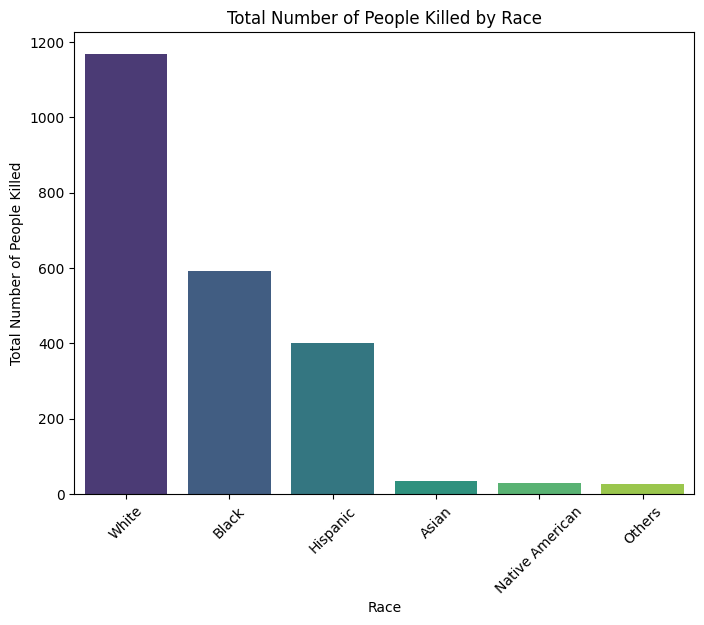

In [181]:
plt.figure(figsize=(8,6))
sns.barplot(x=victims_by_race.index,y=victims_by_race.values,hue=victims_by_race.index,palette='viridis')
plt.xlabel('Race')
plt.ylabel('Total Number of People Killed')
plt.title('Total Number of People Killed by Race')
plt.xticks(rotation=45)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [189]:
percentage_mental_illness = (df_fatalities[df_fatalities['signs_of_mental_illness']==True].shape[0]/len(df_fatalities))*100
print(f"Percentage of people killed by police who had a mental illness: {percentage_mental_illness:.2f}%")
# percentage_mental_illness.shape[0]

Percentage of people killed by police who had a mental illness: 25.42%


In [193]:
count_mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()
px.pie(names=count_mental_illness.index,values=count_mental_illness.values,title='Relationship between Police Killing Victims and Mental Illness')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [232]:
top_10_cities = df_fatalities['city'].value_counts()[:10]

<Axes: title={'center': 'Top 10 Cities with Most Police Killing '}, xlabel='city'>

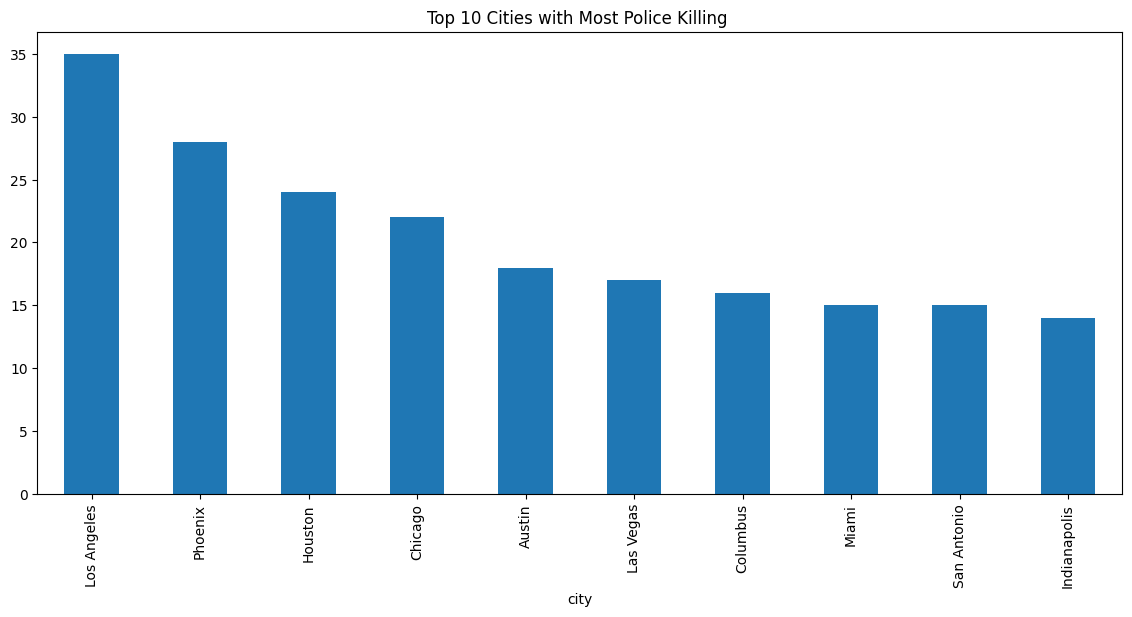

In [235]:
plt.figure(figsize=(14,6))
top_10_cities.plot(kind='bar',title='Top 10 Cities with Most Police Killing ')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [242]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race.fillna(0,inplace=True)
top_10_cities_by_race.head()

race,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,0.00,19.00,1.00,0.00,0.00,2.00
Columbus,0.00,9.00,0.00,0.00,1.00,6.00
Houston,1.00,14.00,5.00,1.00,0.00,3.00
Indianapolis,0.00,9.00,0.00,0.00,0.00,5.00


<Axes: title={'center': 'Rate of Death by Race on Top 10 Cities'}, xlabel='city'>

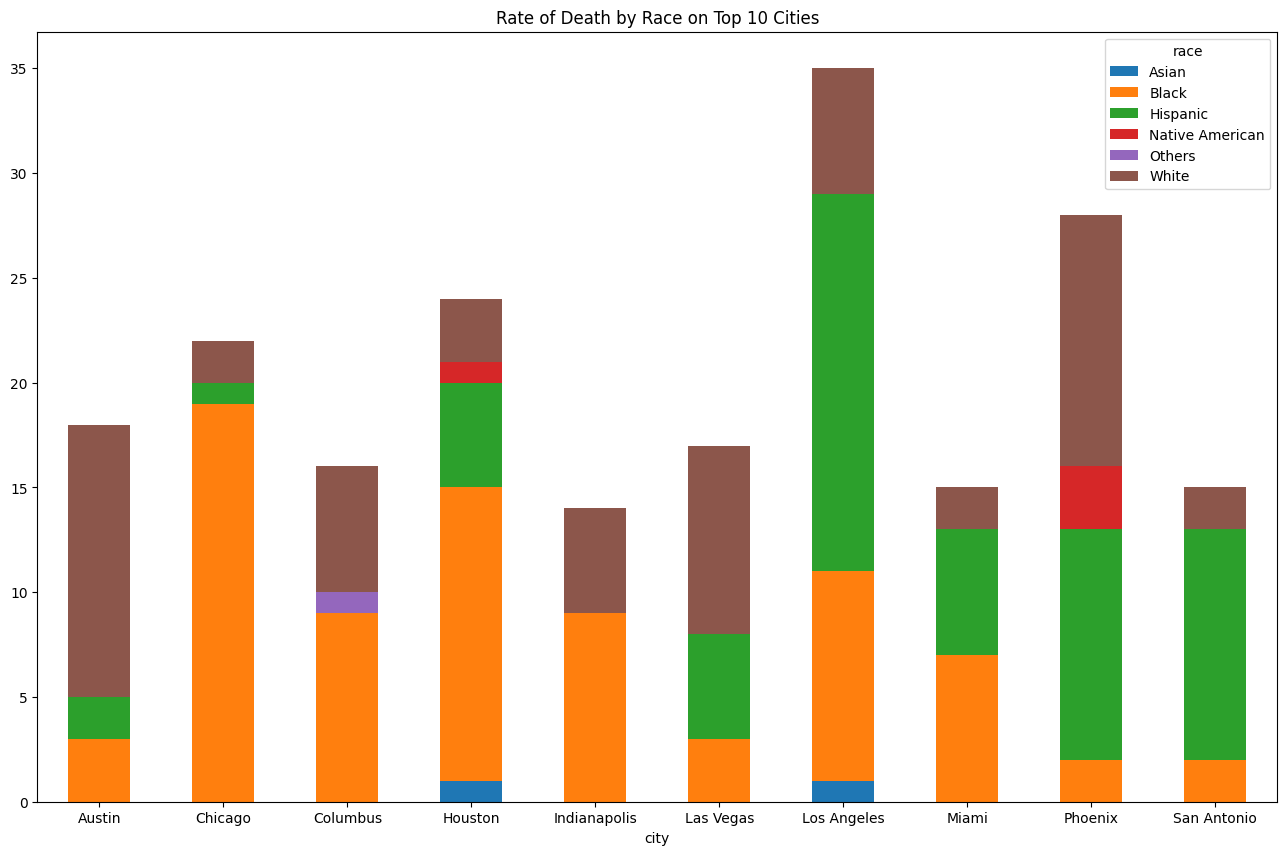

In [245]:
top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    title='Rate of Death by Race on Top 10 Cities',
    rot=0
    
)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [250]:
death_by_state = df_fatalities['state'].value_counts()

In [251]:
px.choropleth(
    data_frame = death_by_state,
    locations = death_by_state.index,
    color = death_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police Killings by State in US'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [253]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

In [254]:
police_killing_overtime = df_fatalities['date'].value_counts().sort_index()

<Axes: title={'center': 'Number of Police Killings over time'}, xlabel='date'>

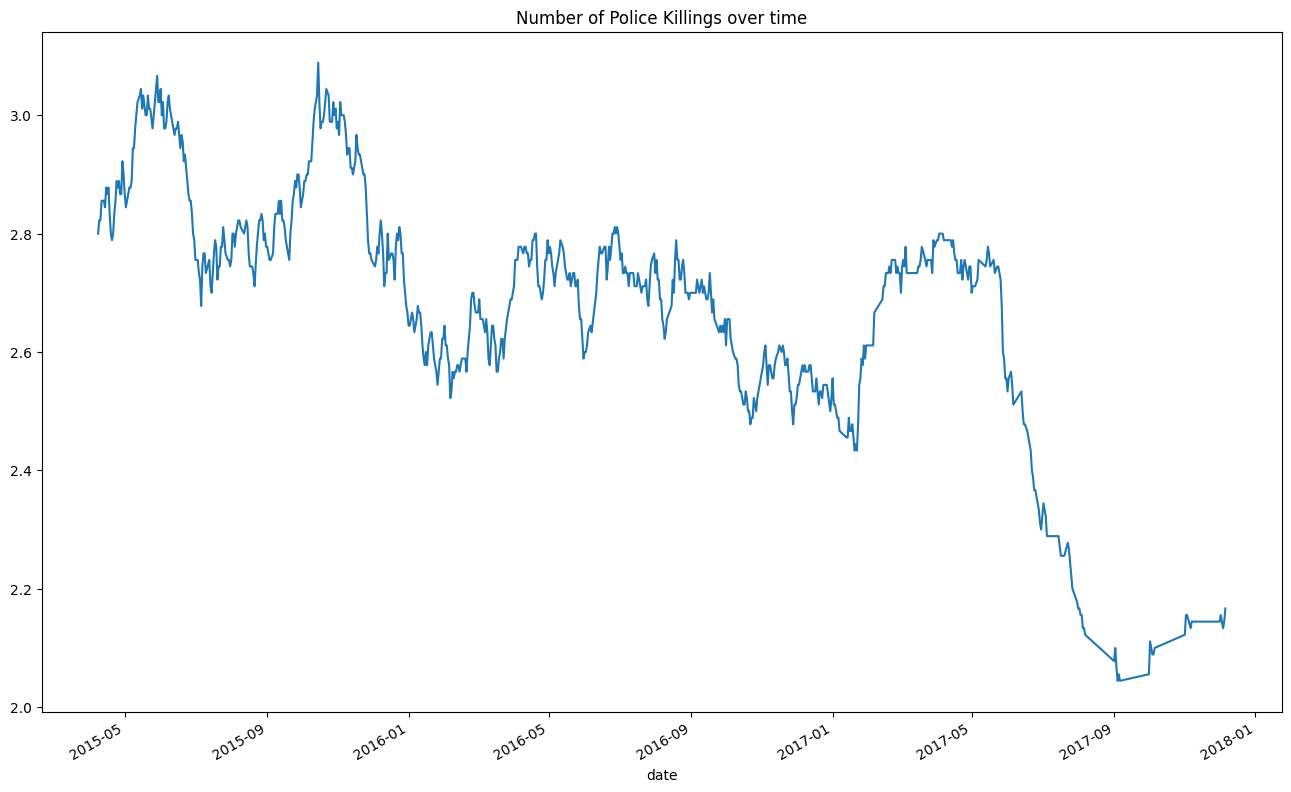

In [255]:
police_killing_overtime.rolling(90).mean().plot(
    title='Number of Police Killings over time',
    figsize = (16,10)
)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).